In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import sys
sys.path.append('C:/Users/faisa\Desktop/DataSciencePurwadhika/Modul2')
import function as fnc

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv(r'C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\data\processed\SupermarketCustomer.csv', parse_dates=['Dt_Customer'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11


> ### make variable contains create a variable that contains column names based on the category in .pdf

In [16]:
people = ['ID', 'Year_Birth', 'age', 'age_category', 'Education', 'Marital_Status', 'Income', 'num_children', 'Dt_Customer', 'Recency', 'Complain']
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
promotion = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
place = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [3]:
# sns.distplot(df['age'], kde=True);
# plt.axvline(x=df['age'].mean(), c='red', label='mean')
# plt.axvline(x=df['age'].median(), c='b', label='median')
# plt.legend()

# from scipy.stats import shapiro

# # check the distribution
# stats, pvalue = shapiro(df['age'])
# # check the pvalue
# if pvalue > 0.05:
#         print(f"pvalue: {pvalue}. So, age has normal distribution")
# else:
#         print(f"pvalue: {pvalue}. So, age has NOT normal distribution")

> ### make new columns called age and  age_category in order to easier to read

#### `age_category` based on [National Institues of Health](https://www.nih.gov/nih-style-guide/age) and [Classification of Age Groups Based on Facial Features](https://www.researchgate.net/publication/228404297_Classification_of_Age_Groups_Based_on_Facial_Features)
- Children (1 year through 12 years)
- teenagers (13 years through 17 years)
- Adults (18 years through 39 years)
- Middle-aged Adults (40 years thorough 59 years)
- old adults (60 years and older)

In [4]:
# Insert age column based on when the customer registered as a member
df.insert(loc = 2, 
          column = 'age', 
          value = df['Dt_Customer'].dt.year - df['Year_Birth'])

# make new column called age_category and import function from my own module called ageclass
df['age_category'] = df.apply(fnc.ageclass, args=('age',), axis=1)
df.head()

,ID,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age_category
0,5524,1957,55,Graduation,Single,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11,middle-aged adults
1,2174,1954,60,Graduation,Single,46344.0,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11,old adults
2,4141,1965,48,Graduation,Together,71613.0,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11,middle-aged adults
3,6182,1984,30,Graduation,Together,26646.0,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11,adults
4,5324,1981,33,PhD,Married,58293.0,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11,adults


> ### make new column called num_children (number of children = Kidhome + Teenhome)

- drop Kidhome column and Teenhome column in order to reduce data rendundancy

In [5]:
# insert new column at index 8
df.insert(loc = 8, 
          column = 'num_children', 
          value = df['Kidhome'] + df['Teenhome'])

# drop Kidhome column and Teenhome column
df.drop(columns=['Kidhome','Teenhome'], axis=1, inplace=True)

df.head()

,ID,Year_Birth,age,Education,Marital_Status,Income,num_children,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age_category
0,5524,1957,55,Graduation,Single,58138.0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11,middle-aged adults
1,2174,1954,60,Graduation,Single,46344.0,2,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11,old adults
2,4141,1965,48,Graduation,Together,71613.0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11,middle-aged adults
3,6182,1984,30,Graduation,Together,26646.0,1,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11,adults
4,5324,1981,33,PhD,Married,58293.0,1,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11,adults


> ### replace 2n Cycle in education column with Master (in order to reduce data rendundancy)

- based on article [study levels and degrees](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/), 2n Cycle and Master has the same meaning

In [6]:
df['Education'].replace(to_replace='2n Cycle', value='Master', inplace=True)

# check unique value in Education column
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

> ### replace several values in marital_status column (in order to reduce data rendundancy)

<br>- replace "Together" with "Married" 
<br>- YOLO and Absurd with "others"
<br>- Alone with "Single"

**reference articles:**
1. [Marital status](https://www.cdc.gov/nchs/hus/sources-definitions/marital-status.htm#print)
2. [Classification of legal marital status](https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=61748&CVD=61748&CLV=0&MLV=1&D=1)

In [7]:
# check number of each value in marital_status column
df.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [8]:
# replace several values
replace_values = {
                'Together' : 'Married',
                'YOLO' : 'others',
                'Absurd' : 'others',
                'Alone' : 'Single'
}

df['Marital_Status'].replace(replace_values, inplace=True)

# check number of each value in marital_status column
df.Marital_Status.value_counts()

Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
others         4
Name: count, dtype: int64

> ### exploration in Place: NumWebPurchases, NumWebVisitsMonth, NumCatalogPurchases, NumStorePurchases.

<Axes: xlabel='MntWines'>

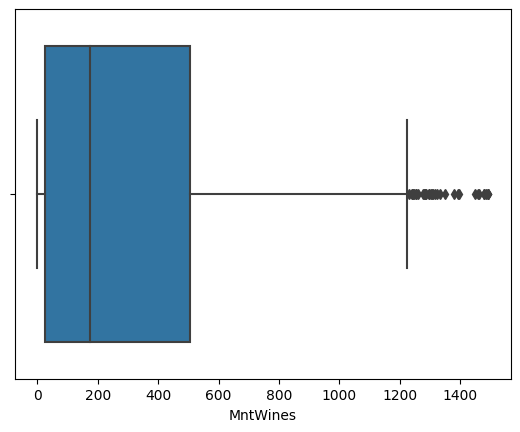

In [32]:
sns.boxplot(df, x='MntWines')

In [33]:
mntwines = fnc.checkquantiles(df, 'MntWines')
upperbound = mntwines[3] + (1.5 * (mntwines[3] - mntwines[1]))
df.loc[df['MntWines'] > upperbound]

,ID,Year_Birth,age,Education,Marital_Status,Income,num_children,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age_category
102,7431,1991,21,PhD,Single,68126.0,0,2012-11-10,40,0,1332,17,311,23,51,86,1,0,0,0,1,0,1,7,4,5,9,3,11,adults
150,9260,1945,67,PhD,Married,70356.0,0,2012-11-05,20,0,1349,16,249,43,16,33,2,0,0,0,0,0,0,10,6,9,6,3,11,old adults
284,2926,1952,60,Master,Married,55951.0,1,2012-08-23,62,0,1241,0,80,0,13,40,3,0,1,0,1,0,0,3,6,11,8,3,11,old adults
411,6932,1941,72,PhD,Married,93027.0,0,2013-04-13,77,0,1285,42,716,55,0,21,0,0,0,0,0,1,0,7,10,5,2,3,11,old adults
417,3725,1961,52,PhD,Single,84865.0,0,2013-05-09,1,0,1248,16,349,43,16,16,1,1,1,0,1,1,1,2,4,9,4,3,11,middle-aged adults
453,7999,1955,58,PhD,Married,75261.0,0,2013-04-23,17,0,1239,17,413,23,34,17,1,0,0,0,1,1,1,5,6,5,2,3,11,middle-aged adults
484,11088,1971,42,PhD,Married,78642.0,1,2013-04-21,83,0,1396,0,322,46,35,17,1,0,0,0,0,0,0,4,9,4,6,3,11,middle-aged adults
502,203,1975,38,Master,Single,81169.0,0,2013-04-14,47,0,1288,20,613,80,61,27,1,0,0,0,0,0,0,5,7,9,2,3,11,adults
510,4943,1953,59,Graduation,Married,70503.0,0,2012-09-30,73,0,1379,33,216,0,33,66,1,0,0,0,1,1,0,2,4,9,6,3,11,middle-aged adults
530,5547,1982,31,PhD,Married,84169.0,0,2013-08-07,9,0,1478,19,403,0,19,0,1,0,0,0,1,1,1,7,6,6,3,3,11,adults


<Axes: xlabel='Education'>

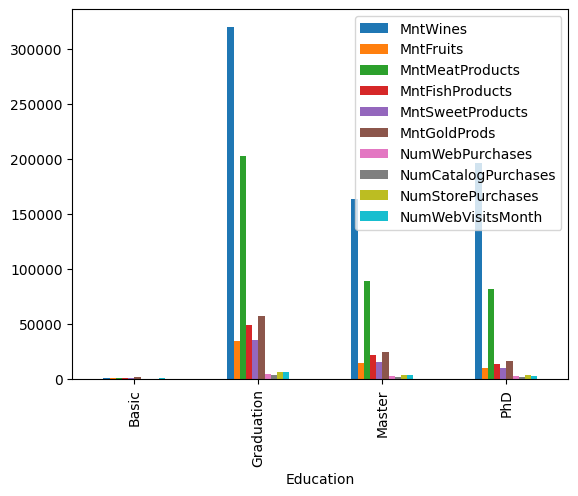

In [30]:
df[['Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].groupby('Education').agg('sum').plot(kind='bar')

<Axes: xlabel='Marital_Status'>

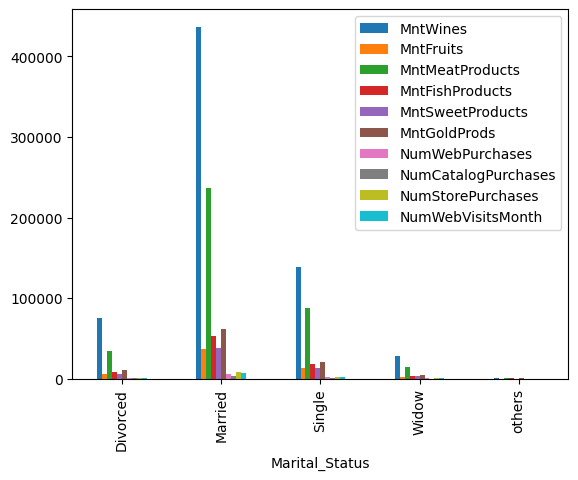

In [29]:
df[['Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].groupby('Marital_Status').agg('sum').plot(kind='bar')

<Axes: xlabel='Marital_Status,Education'>

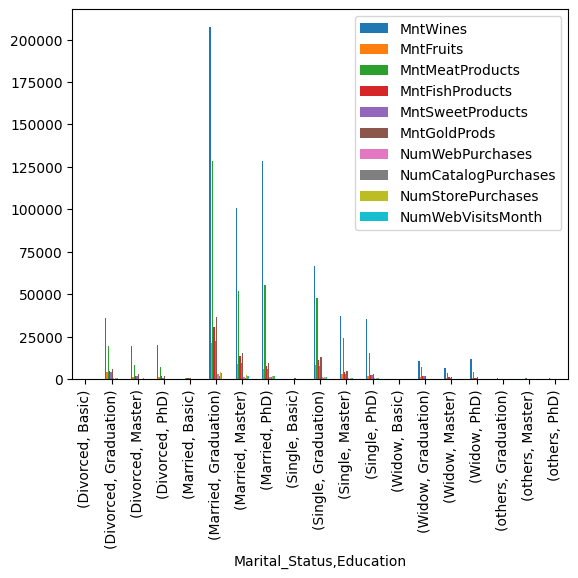

In [31]:
df[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].groupby(['Marital_Status','Education']).agg('sum').plot(kind='bar')

-----------------